In [129]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

import wrangle as w
import explore as e 
import model as m

In [ ]:
# Import functions
def clf_accuracy(clf, x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on your classifier, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate
    '''
    print(f'''
    Accuracy of {clf} on training set: {round(clf.score(x_train, y_train), 2)}
    Accuracy of {clf} on validation set: {round(clf.score(x_validate, y_validate), 2)}
    ''')

def clf_predict(clf, x_train, y_train): 
    '''
    This function takes in the following arguments: clf, x_train, y_train
    Then uses the arguments to make predictions on the train observation and clf
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = clf.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df


def clf_test(clf, x_train, y_train, x_validate, y_validate, x_test, y_test):
    '''
    ! WARNING!: Only use this for your final model 
    This function provides a quick print output of the baseling accuracy train, validation, test scores based on your classifier, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate, x_test, y_test
    '''
    print(f'''
    Baseline Accuracy: {round(baseline_accuracy, 3)}
    Accuracy of {clf} on training set: {round(clf.score(x_train, y_train), 3)}
    Accuracy of {clf} on validation set: {round(clf.score(x_validate, y_validate), 3)}
    Accuracy of {clf} on test set: {round(clf.score(x_test, y_test), 3)}
    ''')
def dt_predict(tree, x_train, y_train): 
    '''
    This function takes in the following arguments: tree, x_train, y_train
    Then uses the arguments to make predictions on the train observation,
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = tree.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df


def depth_check(x_train, y_train, x_validate, y_validate):
    scores_all = []
    for x in range(1,20):

        tree = DecisionTreeClassifier(max_depth=x, random_state=3)
        tree.fit(x_train, y_train)
        train_acc = tree.score(x_train, y_train)

        #evaluate on validate
        val_acc = tree.score(x_validate, y_validate)

        scores_all.append([x, round(train_acc, 6), round(val_acc, 6)])
        
    scores = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
    
    scores['diff'] = round(scores.train_acc - scores.val_acc, 6)
    return scores


    

def dt_depth_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,20) to help determine the best parameter for max_depth.
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = depth_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with max depth on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')

    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    


def rf_predict(rf, x_train, y_train): 
    '''
    This function takes in the following arguments: tree, x_train, y_train
    Then uses the arguments to make predictions on the train observation,
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = rf.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df



def leaf_check(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,11)-min_samples_leaf and descending (1,11) for max_depth to help determine the best parameters
    '''
    scores_all = []

    for x in range(1,11):

        #make it
        rf = RandomForestClassifier(random_state=3, min_samples_leaf=x, max_depth=11-x)
        #fit it
        rf.fit(x_train, y_train)
        #transform it
        train_acc = rf.score(x_train, y_train)

        #evaluate on my validate data
        val_acc = rf.score(x_validate, y_validate)

        scores_all.append([x, 11-x, round(train_acc, 4), round(val_acc, 4)])

    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf','max_depth','train_acc','val_acc'])
    scores_df['difference'] = round(scores_df.train_acc - scores_df.val_acc, 3)
    return scores_df


def rf_leaf_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,11)-min_samples_leaf and descending (1,11) for max_depth to help determine the best parameters
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = leaf_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with (min_samples_leaf asc. 1,11) and (max depth desc. 1,11) on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')
    ax1.set_xlabel('max depth and min leaf sample')
    ax1.set_ylabel('accuracy')
    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

In [92]:
# # acquiring, cleaning, and adding features to data
df = w.prep_telco()
# spliting data
train, validate, test = w.split_data(df, "churn")

In [100]:
# with customer id
df_2 = w.get_telco_data()
test

,partner,dependents,paperless_billing,automatic_payment,churn,tenure
3160,1,1,1,0,0,51
1577,1,0,0,1,0,65
6823,0,0,1,0,1,18
3615,0,0,1,0,0,25
882,0,0,1,0,1,4
...,...,...,...,...,...,...
1097,0,0,0,0,1,2
6441,0,0,1,0,1,1
5985,0,0,1,1,0,67
2452,1,1,0,1,0,72


In [98]:
tr, v, t = w.split_data(df_2, "churn")

In [99]:
t

,payment_type_id,internet_service_type_id,customer_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,churn_month,signup_date,internet_service_type,payment_type
3160,2,2,4531-AUZNK,2,Female,0,Yes,Yes,51,Yes,...,No,Yes,95.15,5000.05,No,One year,None,2017-10-21 18:07:34,Fiber optic,Mailed check
1577,3,1,2296-DKZFP,3,Female,0,Yes,No,65,Yes,...,Yes,No,71.00,4386.2,No,Two year,None,2016-08-21 18:07:34,DSL,Bank transfer (automatic)
6823,1,2,9692-TUSXH,1,Female,0,No,No,18,Yes,...,Yes,Yes,96.05,1740.7,Yes,Month-to-month,2022-01-31,2020-07-21 18:07:34,Fiber optic,Electronic check
3615,1,2,5129-JLPIS,1,Male,0,No,No,25,Yes,...,Yes,Yes,105.50,2686.05,No,Month-to-month,None,2019-12-21 18:07:34,Fiber optic,Electronic check
882,1,2,1273-MTETI,1,Female,1,No,No,4,Yes,...,Yes,Yes,88.85,372.45,Yes,Month-to-month,2022-01-31,2021-09-21 18:07:34,Fiber optic,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1,1,1597-FZREH,1,Female,0,No,No,2,Yes,...,Yes,No,76.40,160.8,Yes,Month-to-month,2022-01-31,2021-11-21 18:07:34,DSL,Electronic check
6441,2,1,9117-SHLZX,1,Male,0,No,No,1,Yes,...,No,Yes,45.70,45.7,Yes,Month-to-month,2022-01-31,2021-12-21 18:07:34,DSL,Mailed check
5985,3,3,8441-SHIPE,3,Female,0,No,No,67,Yes,...,No internet service,Yes,25.60,1790.35,No,Two year,None,2016-06-21 18:07:34,None,Bank transfer (automatic)
2452,4,1,3511-BFTJW,3,Male,0,Yes,Yes,72,No,...,No,No,38.50,2763,No,Two year,None,2016-01-21 18:07:34,DSL,Credit card (automatic)


# Decision Tree Model  

In [7]:
def create_x_y(train, validate, test, target):
    """
    This function creates x and y variables for either a decision tree or a random forest, 
    by using the unsplit df, target variable columns name and column to drop, for multiple columns that need to be 
    dropped create a list of the columns0
    The arguments taken in are train, validate, test, target, drop_col=[])
    The function returns x_train, y_train, x_validate, y_validate, x_test, y_test
    """
    # separates train target variable
    x_train = train.drop(columns=[target])
    y_train = train[target]
    # validate 
    x_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    # test
    x_test = test.drop(columns=[target])
    y_test = test[target]
    
    return x_train, y_train, x_validate, y_validate, x_test, y_test

In [19]:
x_train, y_train, x_validate, y_validate, x_test, y_test = create_x_y(train, validate, testt, "churn")
y_validate

3554    0
2063    0
1737    1
5894    0
209     1
       ..
2529    1
6540    1
5765    0
6959    0
3108    0
Name: churn, Length: 1409, dtype: uint8

In [20]:
# creating baseline:  1's = churned & 0's = not churned  baseline accuracy = 0.7346745562130178
# positive if not churned
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy


0.7346745562130178

In [31]:
# create object 
tree = DecisionTreeClassifier(random_state=3)

# model.fit(x, y)
tree = tree.fit(x_train, y_train)

In [24]:
def dt_accuracy(tree, x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on your decision tree, for easy viewing.
    The function takes the following arguments: tree, x_train, y_train, x_validate, y_validate
    '''
    print(f'''

    Accuracy of Decision Tree classifier on training set: {round(tree.score(x_train, y_train),2)}
    Accuracy of Decision Tree classifier on validation set: {round(tree.score(x_validate, y_validate),2)}
    ''')

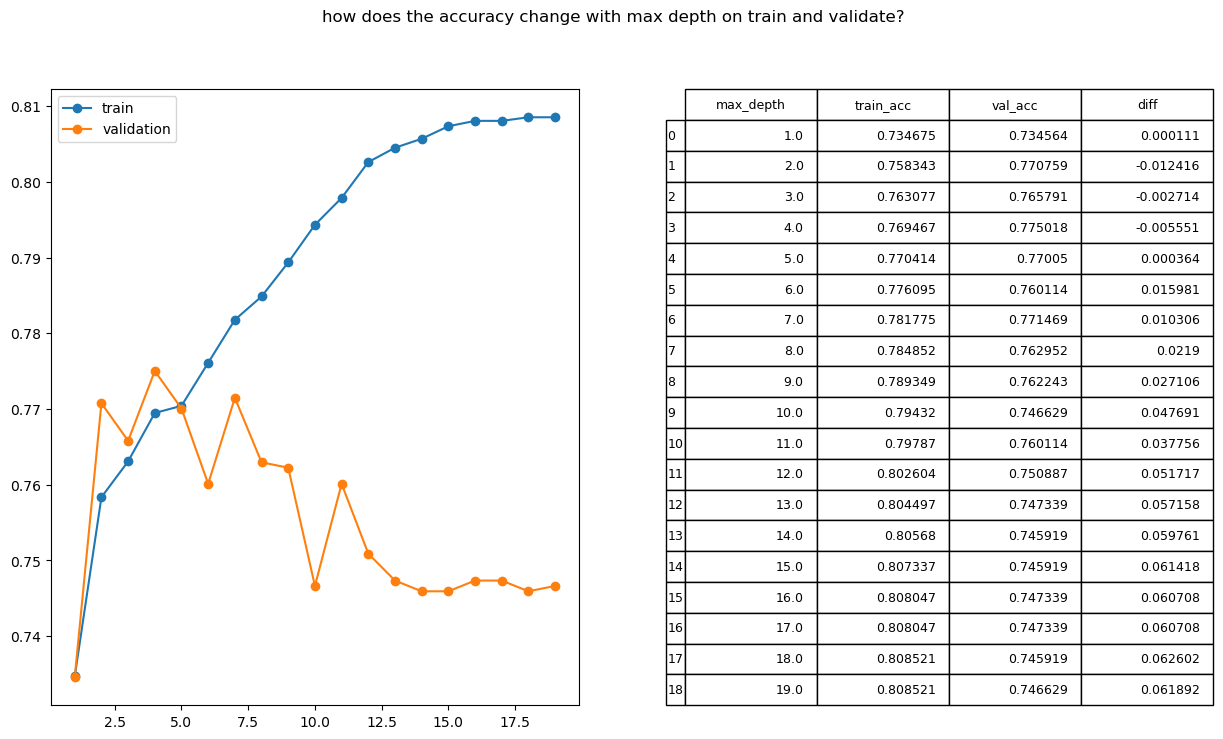

In [27]:
# with feature tenure
m.dt_depth_graph(x_train, y_train, x_validate, y_validate)

In [114]:
# create object 
tree_2 = DecisionTreeClassifier(random_state=3, max_depth=7)

# model.fit(x, y)
tree_2 = tree_2.fit(x_train, y_train)

In [115]:
dt_accuracy(tree_2, x_train, y_train, x_validate, y_validate)



    Accuracy of Decision Tree classifier on training set: 0.78
    Accuracy of Decision Tree classifier on validation set: 0.77
    


In [37]:
# make prediction on train obeservations
y_pred = tree_2.predict(x_train)

#estimate probablility 
y_pred_proba = tree_2.predict_proba(x_train)

# create confusion matrix
conf = confusion_matrix(y_train, y_pred)

# nice dataframe with conf
labels = sorted(y_train.unique())
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,2785,319
1_actual,651,470


In [39]:
def dt_predict(tree, x_train, y_train):    
    # make prediction on train obeservations
    y_pred = tree.predict(x_train)

    #estimate probablility 


    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df

In [41]:
dt_predict(tree_2, x_train, y_train)

,0_predict,1_predict
0_actual,2785,319
1_actual,651,470


In [43]:
def tree_depth(scores):
    plt.figure(figsize=(12,6))
    plt.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    plt.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')
    plt.xlabel('max depth')
    plt.ylabel('accuracy')
    plt.title('how does the accuracy change with max depth on train and validate?')
    plt.legend()
    plt.show()

In [44]:
def depth_check(x_train, y_train, x_validate, y_validate):
    scores_all = []
    for x in range(1,20):

        tree = DecisionTreeClassifier(max_depth=x, random_state=3)
        tree.fit(x_train, y_train)
        train_acc = tree.score(x_train, y_train)

        #evaluate on validate
        val_acc = tree.score(x_validate, y_validate)

        scores_all.append([round(x, 6), round(train_acc, 6), round(val_acc, 6)])
        
    scores = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
    
    scores['diff'] = round(scores.train_acc - scores.val_acc, 6)
    return scores
    
    
    
    

In [45]:
def dt_depth_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,20) to help determine the best parameter for max_depth.
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = depth_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with max depth on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')

    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    

In [ ]:
# Changed max_depth to 3 because of prior results
tree_2 = DecisionTreeClassifier(max_depth=3, random_state=3)

# model.fit(x, y)
tree_2 = tree_2.fit(x_train, y_train)

# score for train = 0.7401183431952663 --- this is greater than the baseline
train_accuracy_2 = tree_2.score(x_train, y_train)

# score for validate = 0.7196593328601846 --- this is less than the baseline
validate_accuracy_2 = tree_2.score(x_validate, y_validate)
train_accuracy_2, validate_accuracy_2

print(f'''

Accuracy of Decision Tree classifier on training set: {round(tree_2.score(x_train, y_train),2)}
Accuracy of Decision Tree classifier on validation set: {round(tree_2.score(x_validate, y_validate),2)}
''')

In [53]:
# Changed max_depth to 5 because of prior results
tree_3 = DecisionTreeClassifier(max_depth=5, random_state=3)

# model.fit(x, y)
tree_3 = tree_3.fit(x_train, y_train)

# score for train = 0.7401183431952663 --- this is greater than the baseline
train_accuracy_3 = tree_3.score(x_train, y_train)

# score for validate = 0.7196593328601846 --- this is less than the baseline
validate_accuracy_3 = tree_3.score(x_validate, y_validate)


print(f'''

Accuracy of Decision Tree classifier on training set: {round(tree_3.score(x_train, y_train),2)}
Accuracy of Decision Tree classifier on validation set: {round(tree_3.score(x_validate, y_validate),2)}
''')



Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on validation set: 0.77



In [ ]:
def best_tree(x_train, y_train, x_validate, y_validate):
    tree = DecisionTreeClassifier(max_depth=3, random_state=3)

    # model.fit(x, y)
    tree = tree.fit(x_train, y_train)

    # score for train
    train_accuracy = tree.score(x_train, y_train)

    # score for validate
    validate_accuracy = tree.score(x_validate, y_validate)


    print(f'''

    Accuracy of Decision Tree classifier on training set: {round(tree.score(x_train, y_train),3)}
    Accuracy of Decision Tree classifier on validation set: {round(tree.score(x_validate, y_validate),3)}
    ''')

# Random Forest model

In [54]:
m.best_tree(x_train, y_train, x_validate, y_validate)


    Accuracy of Decision Tree classifier on training set: 0.76
    Accuracy of Decision Tree classifier on validation set: 0.77
    


In [36]:
# create object
rf = RandomForestClassifier(random_state=3)

# fit model
rf.fit(x_train, y_train)

# evaluate feature importance
print(rf.feature_importances_)

[0.11720507 0.15751509 0.31153932 0.41374053]


In [37]:
# create prdictions
y_pred_rf = rf.predict(x_train)

# Estimate the probability
y_pred_proba_rf = rf.predict_proba(x_train)


In [38]:
# create confusion matrix
conf_rf = confusion_matrix(y_train, y_pred_rf)

# nice dataframe with conf
labels = sorted(y_train.unique())
pd.DataFrame(conf_rf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])


,0_predict,1_predict
0_actual,2724,380
1_actual,718,403


In [ ]:
print(classification_report(y_train, y_pred_rf))

In [ ]:
# evaluate model 
# rf train accuracy score = 0.7401183431952663
rf.score(x_train, y_train)

# rf  validate accuracy score = 0.7196593328601846
rf.score(x_validate, y_validate)

In [ ]:
x_train

In [67]:
def leaf_check(x_train, y_train, x_validate, y_validate):
    scores_all = []

    for x in range(1,11):

        #make it
        rf = RandomForestClassifier(random_state=3, min_samples_leaf=x, max_depth=11-x)
        #fit it
        rf.fit(x_train, y_train)
        #transform it
        train_acc = rf.score(x_train, y_train)

        #evaluate on my validate data
        val_acc = rf.score(x_validate, y_validate)

        scores_all.append([x, 11-x, round(train_acc, 4), round(val_acc, 4)])

    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf','max_depth','train_acc','val_acc'])
    scores_df['difference'] = round(scores_df.train_acc - scores_df.val_acc, 3)
    return scores_df

        
    

In [68]:
def leaf_check2(x_train, y_train, x_validate, y_validate):
    scores_all = []

    for x in range(1,11):

        #make it
        rf = RandomForestClassifier(random_state=3, max_depth=x)
        #fit it
        rf.fit(x_train, y_train)
        #transform it
        train_acc = rf.score(x_train, y_train)

        #evaluate on my validate data
        val_acc = rf.score(x_validate, y_validate)

        scores_all.append([x, round(train_acc, 4), round(val_acc, 4)])

    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf','train_acc','val_acc'])
    scores_df['difference'] = round(scores_df.train_acc - scores_df.val_acc, 3)
    return scores_df

In [69]:
leaf_check2(x_train, y_train, x_validate, y_validate)

,min_samples_leaf,train_acc,val_acc,difference
0,1,0.7347,0.7346,0.000
1,2,0.7591,0.7530,0.006
2,3,0.7626,0.7693,-0.007
3,4,0.7678,0.7764,-0.009
4,5,0.7730,0.7793,-0.006
5,6,0.7815,0.7786,0.003
6,7,0.7837,0.7779,0.006
7,8,0.7882,0.7722,0.016
8,9,0.7948,0.7601,0.035
9,10,0.8014,0.7580,0.043


In [70]:
def rf_graph(scores_df):
    plt.figure(figsize=(12,6))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.val_acc, label='validation', marker='o')
    plt.xlabel('max depth and min leaf sample')
    plt.ylabel('accuracy')

    plt.xticks([2,4,6,8,10],
              [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 4'),('10 and 2')]
              )

    plt.title('how does the accuracy change with max depth on train and validate?')
    plt.legend()
    plt.show()

In [71]:
def rf_leaf_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,11)-min_samples_leaf and descending (1,11) for max_depth to help determine the best parameters
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = leaf_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with (min_samples_leaf asc. 1,11) and (max depth desc. 1,11) on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')
    ax1.set_xlabel('max depth and min leaf sample')
    ax1.set_ylabel('accuracy')
    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
#     bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)


In [77]:
scores = leaf_check2(x_train, y_train, x_validate, y_validate)
scores

,min_samples_leaf,train_acc,val_acc,difference
0,1,0.7347,0.7346,0.000
1,2,0.7591,0.7530,0.006
2,3,0.7626,0.7693,-0.007
3,4,0.7678,0.7764,-0.009
4,5,0.7730,0.7793,-0.006
5,6,0.7815,0.7786,0.003
6,7,0.7837,0.7779,0.006
7,8,0.7882,0.7722,0.016
8,9,0.7948,0.7601,0.035
9,10,0.8014,0.7580,0.043


,partner,dependents,paperless_billing,automatic_payment,tenure
5911,0,1,1,1,26
2479,1,0,0,0,47
5889,0,0,1,0,1
6087,0,0,1,1,69
785,0,0,0,1,51
...,...,...,...,...,...
6102,1,0,0,1,2
356,0,0,1,0,52
1756,0,0,1,0,4
2127,0,0,0,0,35


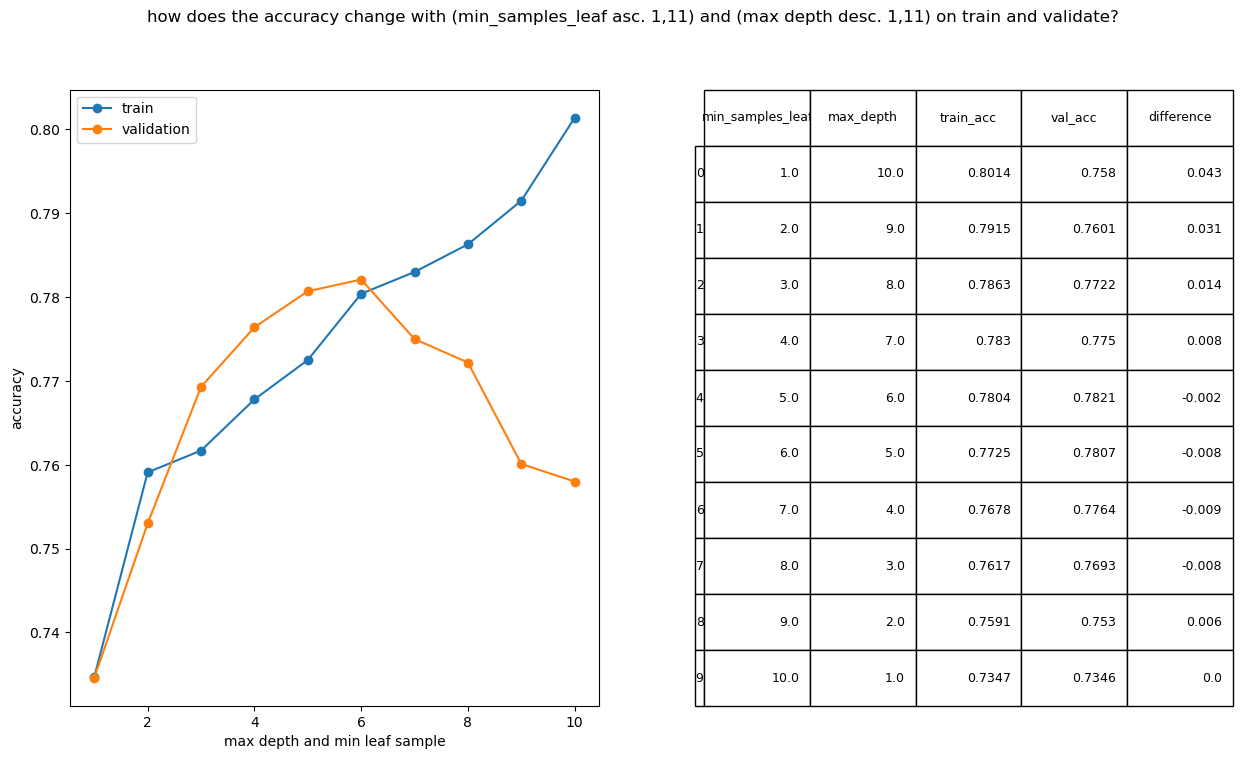

In [119]:
m.rf_leaf_graph(x_train, y_train, x_validate, y_validate)
x_train

# Best of rf

In [116]:
# Changed max_depth to 5 because of prior results
rf = RandomForestClassifier(random_state=3, min_samples_leaf=5, max_depth=6)
#fit it
rf.fit(x_train, y_train)

m.clf_accuracy(rf, x_train, y_train, x_validate, y_validate)


    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on training set: 0.78
    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on validation set: 0.78
    


In [87]:
rf.score(x_test, y_test)

0.7601135557132718

In [ ]:
m.best_forest(x_train, y_train, x_validate, y_validate)

# Logisitics Regression Model

In [82]:
# create object
logit = LogisticRegression()

# model fit 
logit.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logit_2 = LogisticRegression()

# model fit 
logit_2.fit(x_train_2, y_train_2)
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit_2.score(x_train_2, y_train_2),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit_2.score(x_validate_2, y_validate_2),2)}
''')

In [ ]:
def clf_accuracy(clf, x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on your decision tree, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate
    '''
    print(f'''
    Accuracy of {clf} on training set: {round(clf.score(x_train, y_train), 3)}
    Accuracy of {clf} on validation set: {round(clf.score(x_validate, y_validate), 3)}
    ''')

In [ ]:
# evaluate importance of each feature
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


In [ ]:
# make predictions
y_pred_lr = logit.predict(x_train)
y_pred_proba_lr = logit.predict_proba(x_train)
# compute accuracy
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
''')

print(confusion_matrix(y_train, y_pred_lr))


In [ ]:

def clf_predict(clf, x_train, y_train): 
    '''
    This function takes in the following arguments: tree, x_train, y_train
    Then uses the arguments to make predictions on the train observation,
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = clf.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df

In [ ]:
clf_predict(rf_3, x_train_2, y_train_2)

# Best of log

In [86]:
m.clf_accuracy(logit, x_train, y_train, x_validate, y_validate)


    Accuracy of LogisticRegression() on training set: 0.77
    Accuracy of LogisticRegression() on validation set: 0.77
    


In [ ]:
# classification report
print(classification_report(y_train, y_pred_lr))
y_pred_proba_lr

In [ ]:
# Visualize #################################
# create array of probabilities of churning

y_pred_proba_churn = np.array([i[1] for i in y_pred_proba_lr])

fig = plt.figure()
plt.figure(figsize=(10,6))
ax = fig.add_subplot()


# scatter plot where x is the probabilities and y is the churn (0, 1)
ax.scatter(y_pred_proba_churn, y_pred_lr)


In [ ]:
y_pred_proba_churn[y_pred_proba_churn > 0.5]

In [ ]:
# Test Model
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
    Accuracy of Logistic Regression classifier on test set: {round(logit.score(x_test, y_test),2)}
    
''')

In [ ]:
# Test Model 2
print(f'''
    Accuracy of Random Forest classifier on training set: {round(rf_3.score(x_train, y_train),2)}
    Accuracy of Random Forest classifier on validation set: {round(rf_3.score(x_validate_2, y_validate_2),2)}
    Accuracy of Random Forest  classifier on test set: {round(rf_3.score(x_test_2, y_test_2),2)}
    
''')

In [ ]:
def clf_test(clf, x_train, y_train, x_validate, y_validate, x_test, y_test):
    '''
    ! WARNING!: Only use this for your final model 
    This function provides a quick print output of the baseling accuracy train, validation, test scores based on your classifier, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate, x_test, y_test
    '''
    print(f'''
    Baseline Accuracy: {round(baseline_accuracy, 3)}
    Accuracy of {clf} on training set: {round(clf.score(x_train, y_train), 3)}
    Accuracy of {clf} on validation set: {round(clf.score(x_validate, y_validate), 3)}
    Accuracy of {clf} on test set: {round(clf.score(x_test, y_test), 3)}
    ''')

In [ ]:
clf_test(logit, x_train, y_train, x_validate, y_validate, x_test, y_test, )

# KNN model 

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

In [ ]:
m.clf_accuracy(knn, x_train, y_train, x_validate, y_validate)

In [ ]:
m.clf_predict(knn, x_train, y_train)

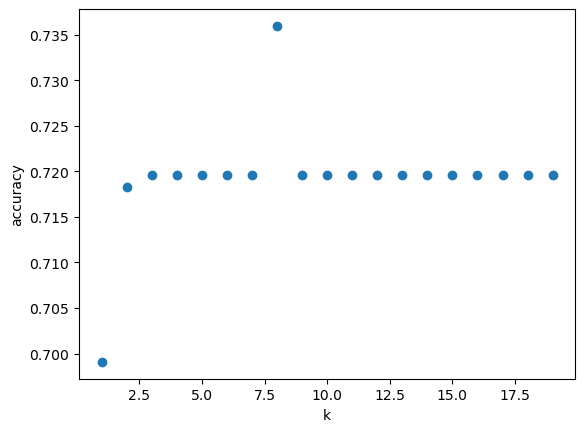

,partner,dependents,paperless_billing,automatic_payment,churn
3160,1,1,1,0,0
1577,1,0,0,1,0
6823,0,0,1,0,1
3615,0,0,1,0,0
882,0,0,1,0,1
...,...,...,...,...,...
1097,0,0,0,0,1
6441,0,0,1,0,1
5985,0,0,1,1,0
2452,1,1,0,1,0


In [146]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

plt.show()
test

# Final test model 

In [161]:
m.best_model(x_train, y_train, x_validate, y_validate, x_test, y_test)



    Accuracy of RandomForestClassifier(max_depth=3, random_state=3) on training set: 0.73
    Accuracy of RandomForestClassifier(max_depth=3, random_state=3) on validation set: 0.73
    Accuracy of RandomForestClassifier(max_depth=3, random_state=3) on test set: 0.73
    


3160    0
1577    0
6823    1
3615    0
882     1
       ..
1097    1
6441    1
5985    0
2452    0
983     1
Name: churn, Length: 1409, dtype: uint8

In [172]:
# Create csv with test model and predictions

rf = RandomForestClassifier(random_state=3, max_depth=3)
rf = rf.fit(x_train, y_train)
test_pred = rf.predict(x_test)

y_pred_proba = rf.predict_proba(x_test)

prob_of_churn = y_pred_proba[:,1]
test_pred
test


,partner,dependents,paperless_billing,automatic_payment,churn
3160,1,1,1,0,0
1577,1,0,0,1,0
6823,0,0,1,0,1
3615,0,0,1,0,0
882,0,0,1,0,1
...,...,...,...,...,...
1097,0,0,0,0,1
6441,0,0,1,0,1
5985,0,0,1,1,0
2452,1,1,0,1,0


In [88]:
rf = RandomForestClassifier(random_state=3, min_samples_leaf=5, max_depth=6)
#fit it
rf.fit(x_train, y_train)

m.clf_accuracy(rf, x_train, y_train, x_validate, y_validate)


    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on training set: 0.78
    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on validation set: 0.78
    


In [93]:
# Create csv with test model and predictions


test_pred = rf.predict(x_test)

y_pred_proba = rf.predict_proba(x_test)

prob_of_churn = y_pred_proba[:,1]
test_pred

prob_of_churn

array([0.20231836, 0.0474818 , 0.43264014, ..., 0.08260329, 0.00927032,
       0.48653356])

In [94]:
# create a dataframe with customer_id , probability of churn, and prediction
prediction_df = pd.DataFrame({'customer_id': test.customer_id,
                              'probability_of_churn': rf.predict_proba(x_test)[:,1],
                              'prediction_of_churn': rf.predict(x_test)})
prediction_df.to_csv("prediction_df.csv")

AttributeError: 'DataFrame' object has no attribute 'customer_id'

In [183]:
prediction_df

,customer_id,probability_of_churn,prediction_of_churn
3160,4531-AUZNK,0.270361,0
1577,2296-DKZFP,0.109024,0
6823,9692-TUSXH,0.468357,0
3615,5129-JLPIS,0.468357,0
882,1273-MTETI,0.468357,0
...,...,...,...
1097,1597-FZREH,0.297827,0
6441,9117-SHLZX,0.468357,0
5985,8441-SHIPE,0.248280,0
2452,3511-BFTJW,0.075365,0


In [182]:
print(confusion_matrix(y_test, test_pred))

[[1035    0]
 [ 374    0]]


In [157]:
test_id = t[["customer_id"]]
test_pred = pd.DataFrame(rf.predict(x_test))
test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
1404,0
1405,0
1406,0
1407,0


In [140]:
pd.concat([test_id, test_pred], axis=1)

,customer_id,0
3160,4531-AUZNK,NaN
1577,2296-DKZFP,NaN
6823,9692-TUSXH,NaN
3615,5129-JLPIS,NaN
882,1273-MTETI,0.0
...,...,...
1404,NaN,0.0
1405,NaN,0.0
1406,NaN,0.0
1407,NaN,0.0


In [135]:
test_csv_pred

,customer_id,0
3160,4531-AUZNK,NaN
1577,2296-DKZFP,NaN
6823,9692-TUSXH,NaN
3615,5129-JLPIS,NaN
882,1273-MTETI,0.0
...,...,...
1404,NaN,0.0
1405,NaN,0.0
1406,NaN,0.0
1407,NaN,0.0


In [120]:
def prob_csv(tt, x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(random_state=3, min_samples_leaf=5, max_depth=6)
    rf = rf.fit(x_train, y_train)
    prediction_df = pd.DataFrame({'customer_id': t.customer_id,
                              'probability_of_churn': rf.predict_proba(x_test)[:,1],
                              'prediction_of_churn': rf.predict(x_test)})
    prediction_df.to_csv("prediction_df_test.csv")
    print(rf.predict(x_test))
    

In [121]:
rf = RandomForestClassifier(random_state=3, max_depth=3)
rf = rf.fit(x_train, y_train)
prediction_df = pd.DataFrame({'customer_id': t.customer_id,
                          'probability_of_churn': rf.predict_proba(x_test)[:,1],
                          'prediction_of_churn': rf.predict(x_test)})

In [122]:
rf.score(x_test, y_test)

0.7551454932576295

In [123]:
prediction_df.prediction_of_churn.value_counts()

0    1302
1     107
Name: prediction_of_churn, dtype: int64

In [124]:
prob_csv(t, x_train, y_train, x_test, y_test)

[0 0 0 ... 0 0 0]


In [128]:
def get_telco_data(directory=os.getcwd(), filename="telco_churn.csv"):
    """
    This function searches the local directory for the csv file and returns if exists.
    However, if csv doesn't exists it will create a df of the predefined SQL_query and write the df to csv.
    This function is currently set to output the telco_churn df from the current working directory.
"""
    SQL_query = ''' select * from customers
                    left join contract_types
                    using (contract_type_id)
                    left join customer_churn
                    using (customer_id)
                    left join customer_signups
                    using (customer_id)
                    join internet_service_types
                    using (internet_service_type_id)
                    join payment_types
                    using (payment_type_id);
'''

    if os.path.exists(directory + filename):
        df = pd.read_csv(filename) 
        return df
    
    else:
        df = pd.read_sql(SQL_query, env.get_db_url('telco_churn'))
#         df = new_telco_data(SQL_query)
        
        #want to save to csv
        df.to_csv(filename)
        return df

NameError: name 'os' is not defined

In [127]:
def prep_telco2(df=get_telco_data(directory=os.getcwd())):
    '''
    The function will clean the telco dataset with features prior to explore.
    The function will also return to dataframes:
    '''
    # encoding payment type automatic payment equals 1 and non_automatic equals 0
    df["automatic_payment"] = df["payment_type"].map({"Bank transfer (automatic)": 1, "Credit card (automatic)": 1, "Mailed check": 0, "Electronic check": 0})

    # create dummies
    dummy_df = pd.get_dummies(df[["partner",
                                 "dependents", 
                                 "paperless_billing", 
                                 "gender",
                                 "churn"]],
                              drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    # rename columns
    df = df[["customer_id","partner_Yes", "dependents_Yes", "paperless_billing_Yes", "automatic_payment", "churn_Yes", "gender_Male", "tenure"]]
    
    df = df.rename(columns={"partner_Yes": "partner", "dependents_Yes": "dependents", "paperless_billing_Yes": "paperless_billing",  "gender_Male": "gender","churn_Yes": "churn"})
    # df for modeling
    
    return df

NameError: name 'get_telco_data' is not defined